In [6]:
# Импорт библиотек
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Чтение таблиц
train = pd.read_csv("ExtrataskData/train.csv", na_values="NA")
macro = pd.read_csv("ExtrataskData/macro.csv",  na_values="NA")

main = train[["full_sq", "life_sq", "build_year", "num_room", "kitch_sq", "timestamp", "floor", "max_floor", "material", # Основные параметры
              'railroad_station_walk_km', "public_transport_station_km", 'university_km', "workplaces_km", "shopping_centers_km", "office_km", # Второстепенные параметры
              'sadovoe_km', "bulvar_ring_km", 'kremlin_km', "big_road1_km", "railroad_km", "area_m", # Второстепенные параметры
              "price_doc"]] # Целевая переменная


# Работа с NA
main["life_sq"] = main["life_sq"].fillna(round(main["life_sq"].mean()))
main["build_year"] = main["build_year"].fillna(round(main["build_year"].median()))
main["kitch_sq"] = main["kitch_sq"].fillna(round(main["kitch_sq"].median()))
main["num_room"] = main["num_room"].fillna(round(main["num_room"].median()))
main["max_floor"] = main["max_floor"].fillna(round(main["max_floor"].mean()))
main["material"] = main["material"].fillna(0)
# Замена некоторых значений
main[[main["build_year"] < 1800]] = round(main["build_year"].median())
main[[main["kitch_sq"] > main["full_sq"], main["kitch_sq"] > 200]] = round(main["kitch_sq"].median())
# Удаление аномальных или неподходящих значений
main.drop(main[main["build_year"] > 2015].index, inplace = True)
main.drop(main[main["num_room"] > 9].index, inplace = True)
main.drop(main[main["num_room"] < 1].index, inplace = True)
main.drop(main[main['full_sq'] > 250].index, inplace = True)
main.drop(main[main['full_sq'] < 10].index, inplace = True)
main.drop(main[main['price_doc'] < 100000].index, inplace = True)
main.drop(main[main['price_doc'] > 100000000].index, inplace = True)
main.drop(main[main['life_sq'] > 220].index, inplace = True)
main.drop(main[main["floor"] > main["max_floor"]].index, inplace = True)
main.drop(main[main['material'] == 0].index, inplace = True)

# Создание списков для новых колонок
extracted_col = []
gdp_col = []
for i in main["timestamp"]:
  if "2011" in i:
    extracted_col.append(2011)
  elif "2012" in i:
    extracted_col.append(2012)
  elif "2013" in i:
    extracted_col.append(2013)
  elif "2014" in i:
    extracted_col.append(2014)
  elif "2015" in i:
    extracted_col.append(2015)
  gdp_col.append(macro[macro["timestamp"] == i]["gdp_quart_growth"])

# Добавление новых колонок
main.insert(5, "year", extracted_col)
main.insert(6, "gdp_quart_growth", gdp_col)

# Приведение к определённому типу данных для удобства работы
main['gdp_quart_growth'] = main['gdp_quart_growth'].astype(float)
main['num_room'] = main['num_room'].astype(int)
#main.drop('timestamp', axis= 1 , inplace= True )

/var/folders/mz/c85xwc6170v72j1f_tsm0bkh0000gn/T/ipykernel_18454/16818194.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main["life_sq"] = main["life_sq"].fillna(round(main["life_sq"].mean()))
/var/folders/mz/c85xwc6170v72j1f_tsm0bkh0000gn/T/ipykernel_18454/16818194.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main["build_year"] = main["build_year"].fillna(round(main["build_year"].median()))
/var/folders/mz/c85xwc6170v72j1f_tsm0bkh0000gn/T/ipykernel_18454/16818194.py:19: SettingWithCopyWarning

# ***Основные параметры***



*   full_sq
*   floor
*   material





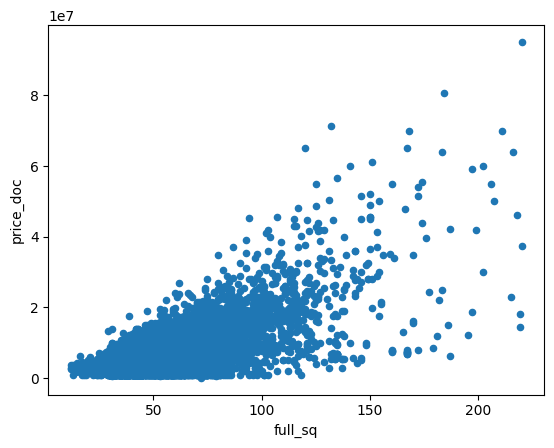

In [7]:
main.plot.scatter(x="full_sq", y="price_doc")
plt.show() #!!!!!!!!!!!!!!!!!!!!!!!!!!!!

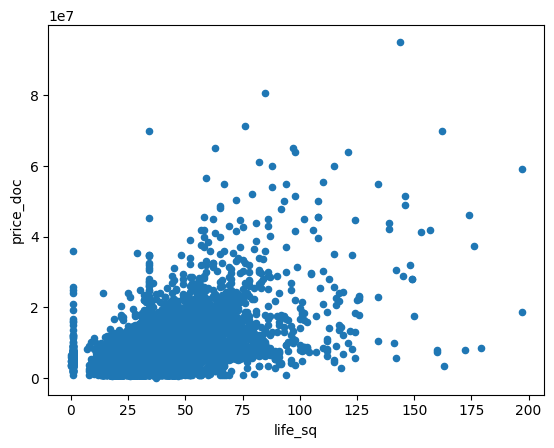

In [8]:
main.plot.scatter(x="life_sq", y="price_doc")
plt.show()

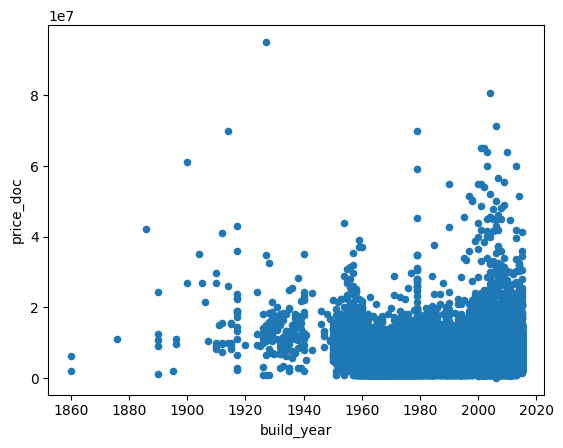

In [9]:
main.plot.scatter(x="build_year", y="price_doc")
plt.show()

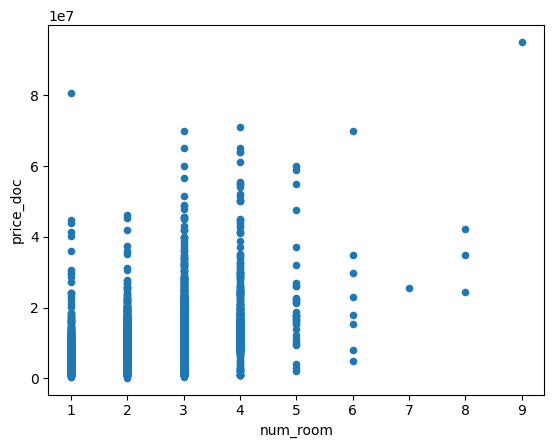

In [10]:
main.plot.scatter(x="num_room", y="price_doc")
plt.show() #!!!!!!!!!!!!!!!!!!!!!

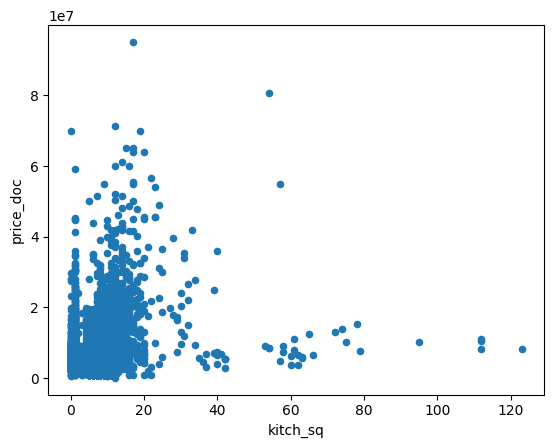

In [11]:
main.plot.scatter(x="kitch_sq", y="price_doc")
plt.show()

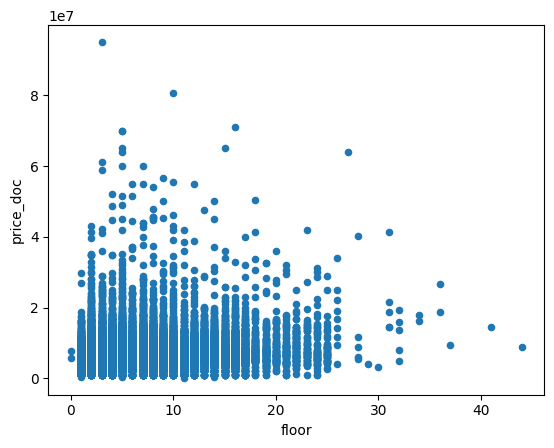

In [12]:
main.plot.scatter(x="floor", y="price_doc")
plt.show() #!!!!!!!!!!!!!!!!!!!!!!!!

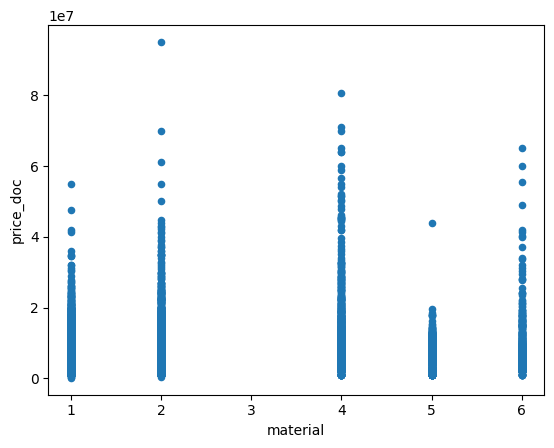

In [13]:
main.plot.scatter(x="material", y="price_doc")
plt.show() #!!!!!!!!!!!!!!!!!!!

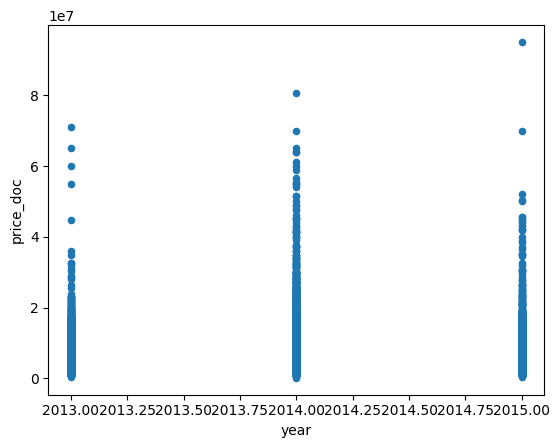

In [14]:
main.plot.scatter(x="year", y="price_doc")
plt.show()

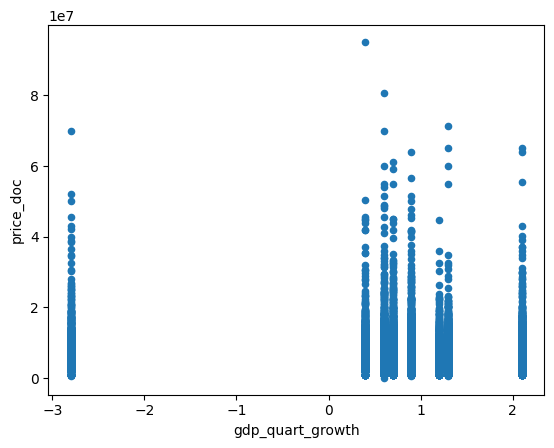

In [15]:
main.plot.scatter(x="gdp_quart_growth", y="price_doc")
plt.show()

# ***Дополнительно***

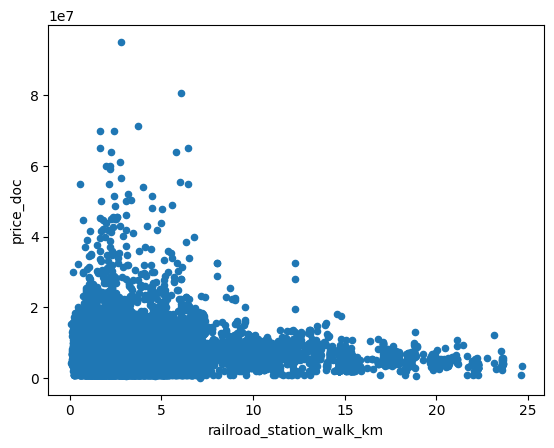

In [16]:
main.plot.scatter(x="railroad_station_walk_km", y="price_doc")
plt.show()

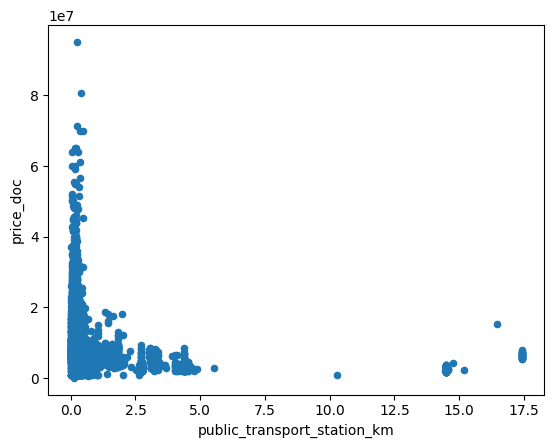

In [17]:
main.plot.scatter(x="public_transport_station_km", y="price_doc")
plt.show()

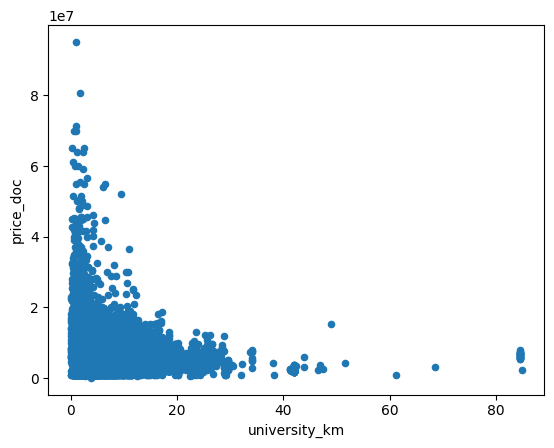

In [18]:
main.plot.scatter(x="university_km", y="price_doc")
plt.show()

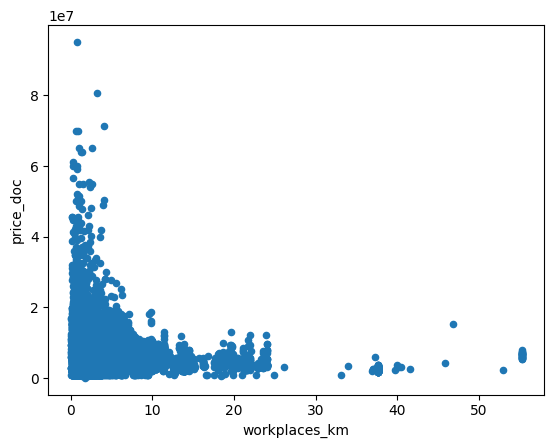

In [19]:
main.plot.scatter(x="workplaces_km", y="price_doc")
plt.show()

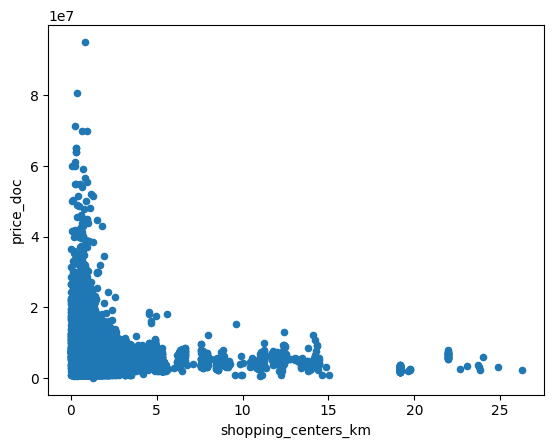

In [20]:
main.plot.scatter(x="shopping_centers_km", y="price_doc")
plt.show()

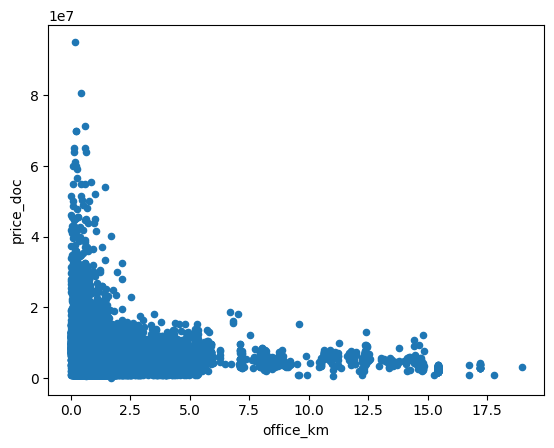

In [21]:
main.plot.scatter(x="office_km", y="price_doc")
plt.show()

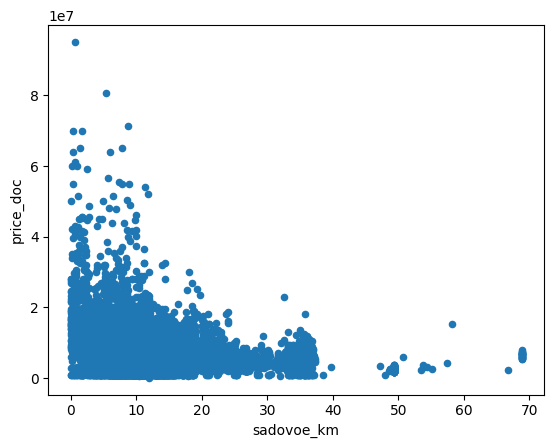

In [22]:
main.plot.scatter(x="sadovoe_km", y="price_doc")
plt.show()

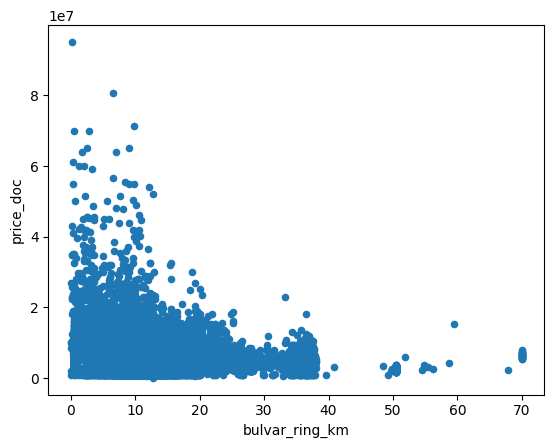

In [23]:
main.plot.scatter(x="bulvar_ring_km", y="price_doc")
plt.show()

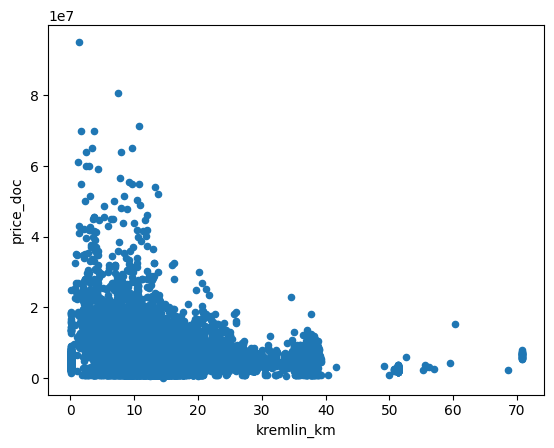

In [24]:
main.plot.scatter(x="kremlin_km", y="price_doc")
plt.show()

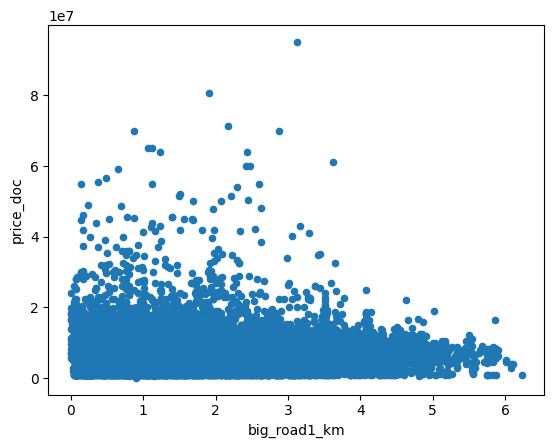

In [25]:
main.plot.scatter(x="big_road1_km", y="price_doc")
plt.show()

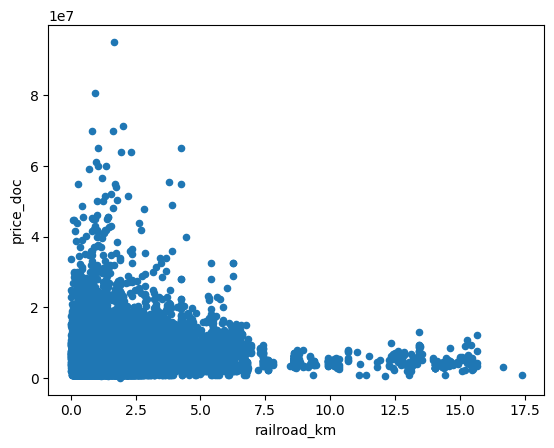

In [26]:
main.plot.scatter(x="railroad_km", y="price_doc")
plt.show()

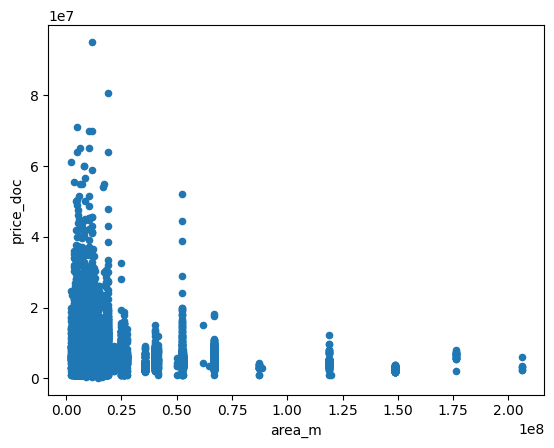

In [27]:
main.plot.scatter(x="area_m", y="price_doc")
plt.show()